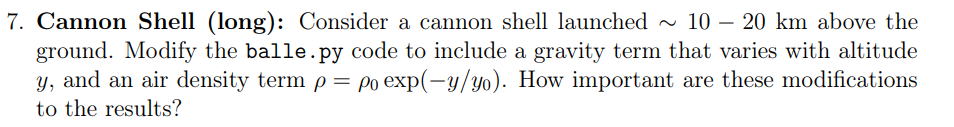

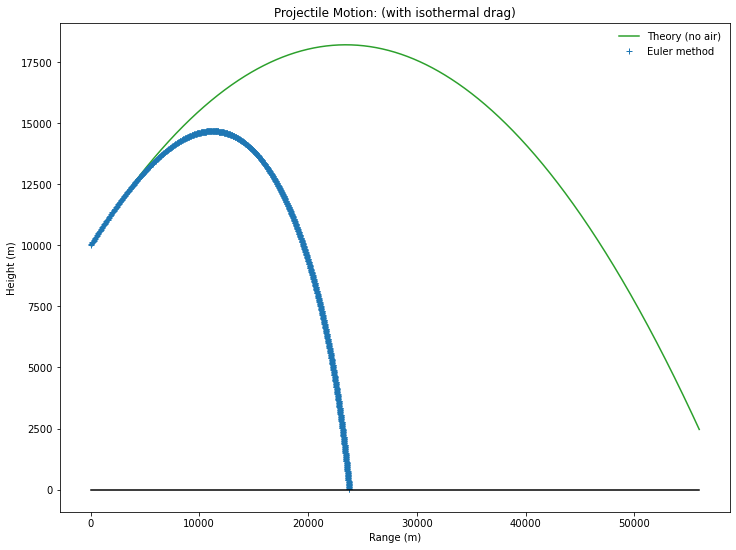

In [13]:
# Balle - Program to compute the trajectory of a baseball using the Euler method.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt


# user-varied parameters: (to be put in eval/input cases)
#     method = 2 # 0 for Euler, 1 for Euler-Cromer, 2 for midpoint
y0 = 10_000 # meters
speed = 700 # m/s
theta = 35 # degrees
timeLimit = 3000 # seconds

methDict = ['Euler', 'Euler-Cromer', 'Midpoint']
method = 0
r0 = np.array([0., y0])  # Initial vector position
v0 = np.array([speed * np.cos(theta*np.pi/180), speed * np.sin(theta*np.pi/180)])  # initial velocity
r = np.copy(r0)  # Set initial position
v = np.copy(v0)  # Set initial velocity

# Set physical parameters (mass, Cd, etc.)
Cd = 0.35  # Drag coefficient (dimensionless)
area = 4.3e-3  # Cross-sectional area of projectile (m^2)
# mass = 0.145   # Mass of projectile (kg)
mass = 5 # Mass of projectile (kg)
grav = 9.81    # Gravitational acceleration (m/s^2)

# Set air resistance flag
# airFlag = eval(input('Add air resistance? (Yes: 1 No: 0)'))
airFlag = 1
if airFlag == 0:
    rho0 = 0.       # No air resistance
    air_text = '(no air)'
else:
    rho0 = 1.2     # Density of air (kg/m^3)
    air_text = '(with isothermal drag)'

# * Loop until ball hits ground or max steps completed
# tau = eval(input('Enter timestep dt in seconds: '))  # (sec)
tau = .1
maxstep = 1000
laststep = maxstep

# Set up arrays for data
xplot = np.empty(maxstep)
yplot = np.empty(maxstep)

x_noAir = np.empty(maxstep)
y_noAir = np.empty(maxstep)

for istep in range(maxstep):
    t = istep * tau  # Current time
    
    # Record computed position for plotting
    xplot[istep] = r[0]
    yplot[istep] = r[1]
    
    x_noAir[istep] = r0[0] + v0[0]*t
    y_noAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2
    
    rho = rho0*np.exp(-yplot[istep]/y0)
    air_const = -0.5*Cd*rho*area/mass   # Air resistance constant
    
    # Calculate the acceleration of the ball
    accel = air_const * np.linalg.norm(v) * v  # Air resistance
    gravUpdate = 9.8*np.exp(-.01*yplot[istep-1]/y0)
    accel[1] = accel[1] - gravUpdate # update y acceleration to include gravity
    if method == 0:
        # Calculate the new position and velocity using Euler's method.
        r = r + tau * v  # Euler step
        v = v + tau * accel
    elif method == 1:
        # calculate the new position and velocity using Euler-Cromer method
        # note how the reassignment of v is required to happen before r as 
        # the new v is used in the new r
        v = v + tau * accel
        r = r + tau * v
    elif method == 2:
        # Calculate the new position and velocity using the midpoint method
        r = r + tau * v + 0.5*accel*(tau**2)
        v = v + tau * accel

#     If the ball reaches the ground (i.e. y < 0) or max runtime reached, break out of the loop
    if r[1] <= 0 or (istep * tau >= timeLimit):
#     if istep * tau >= timeLimit:
        laststep = istep + 1
        xplot[laststep] = r[0]  # Record last values completed
        yplot[laststep] = r[1]
        break

# Graph the trajectory of the baseball
fig, ax = plt.subplots(figsize=(12,9))
ax.set_title('Projectile Motion: ' + air_text)
ax.plot(x_noAir[:laststep], y_noAir[:laststep], '-', c='C2', label='Theory (no air)')
ax.plot(xplot[:laststep], yplot[:laststep], '+', label=f'{methDict[method]} method')
# Mark the location of the ground by a straight line
ax.plot(np.array([0.0, x_noAir[laststep-1]]), np.array([0.0, 0.0]), '-', color='k')
ax.legend(frameon=False)
ax.set_xlabel('Range (m)')
ax.set_ylabel('Height (m)')
plt.show()
